# ***1.Cargue las librerías básicas para iniciar el trabajo. Vaya cargando las librerías a medida que las necesite***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# ***2. Cargue el dataset***

In [ ]:
data = pd.read_csv("Heart_failure_clinical_records_dataset.csv")

# ***3.Explore los datos (use shape, columns, info, describe)***

In [ ]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
data.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90,1,337,0,38,0,390000.0,0.9,144,0,0,256,0
290,45,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
291,60,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
print(f'El numero de filas es: {data.shape[0]}')
print(f'El numero de columnas es: {data.shape[1]}')

El numero de filas es: 299
El numero de columnas es: 13


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.879599,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.911540,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


# ***4.Analice la correlación entre las variables y construya un mapa de calor***

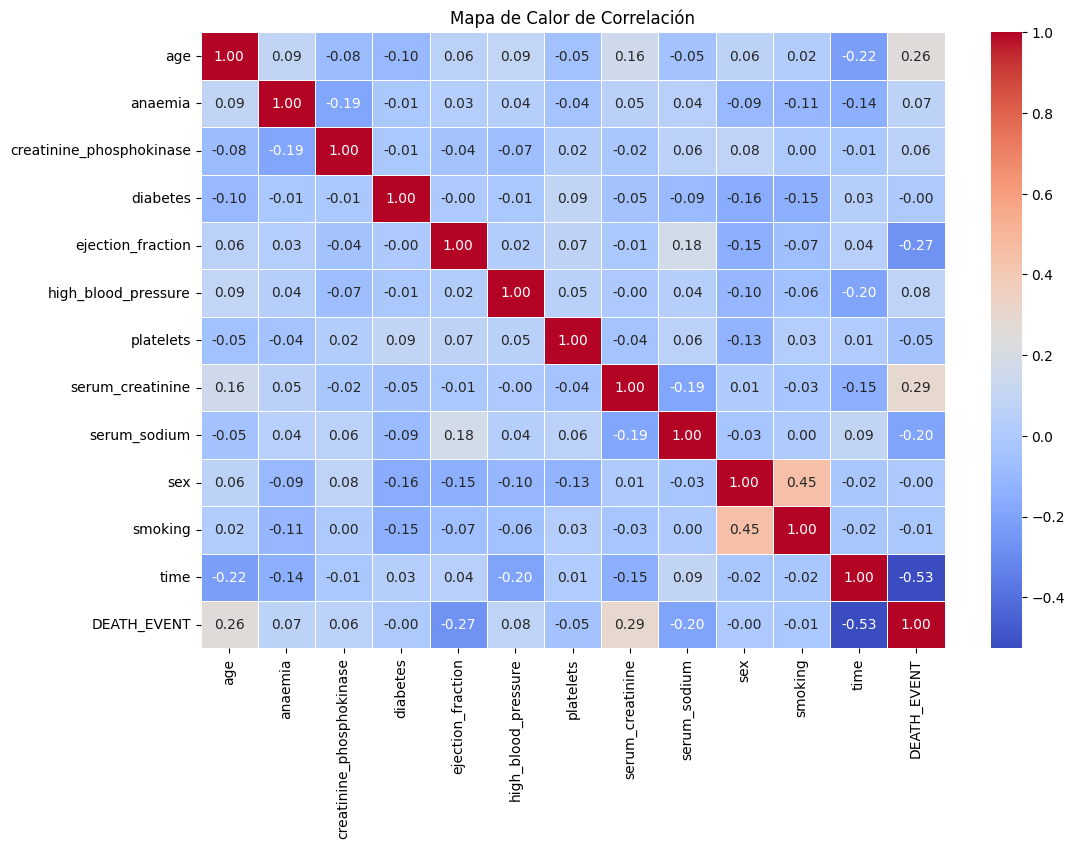

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()


# ***5.¿Qué concluye?***

Se encontró que variables como la creatinina sérica y la edad tienen correlaciones positivas moderadas con DEATH_EVENT, indicando que un aumento en estos valores podría aumentar la probabilidad de muerte. Por otro lado, la variable tiempo muestra una correlación negativa moderada, sugiriendo que un mayor tiempo de seguimiento reduce la probabilidad de muerte, posiblemente debido a tratamientos o estudios prolongados. Varias otras variables, como fumar y el sexo, tienen bajas correlaciones con la mayoría de las variables, indicando una relación débil sin embargo en otros estudios realizados en este mismo curso se evidencia que el sexo y fumar son directamente proporcionales sin embargo para este caso hay factores que afectan con mayor magnitud ante cualquier cambio.
Este análisis sugiere que las variables con correlaciones más fuertes son candidatas serian mas viables para ser incluidas en modelos predictivos como posiblement se realizaran a continuación.



# ***6.Separe el dataset en dos partes, una para entrenamiento y otra para prueba.***


In [ ]:
# Definiendo las variables
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Dividiendo el conjunto de datos en un conjunto de entrenamiento y otro de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (239, 12)
X_test shape: (60, 12)
y_train shape: (239,)
y_test shape: (60,)


# ***7.Instancie un modelo de Regresión Logística con Scikit-Learn o StasModels.***

In [ ]:


# Instanciando el modelo de regresión logística
log_reg = LogisticRegression()

# Ajustando el modelo con los datos de entrenamiento
log_reg.fit(X_train, y_train)


LogisticRegression()

Como Scikit learn se ve un poco por encima para complementar se realiza una matriz de confusion

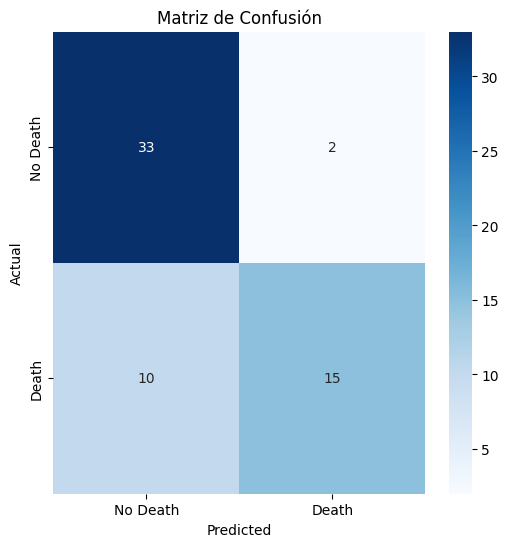

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



In [ ]:


# Prediciendo con el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Generando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Creando un reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Visualizando la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['No Death', 'Death'],
            yticklabels=['No Death', 'Death'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Imprimiendo el reporte de clasificación
print(class_report)


In [ ]:


# Agregando una columna constante para el intercepto
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Instanciando y ajustando el modelo de regresión logística con StatsModels
log_reg_sm = sm.Logit(y_train, X_train_sm).fit()

# Mostrando el resumen del modelo
print(log_reg_sm.summary())


Optimization terminated successfully.
         Current function value: 0.325015
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  239
Model:                          Logit   Df Residuals:                      226
Method:                           MLE   Df Model:                           12
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                  0.4658
Time:                        15:25:49   Log-Likelihood:                -77.679
converged:                       True   LL-Null:                       -145.40
Covariance Type:            nonrobust   LLR p-value:                 4.975e-23
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        9.2280      6.707      1.376      0.169      -3.917

# ***8 y 9. Realice el ajuste de los datos de prueba al modelo y Realice el pronostico con los datos de prueba***


In [ ]:

y_pred_test = log_reg.predict(X_test)


y_pred_proba = log_reg.predict_proba(X_test)

# Mostrando las primeras 10 predicciones, probabilidades y las etiquetas reales
print("Predicciones del modelo:", y_pred_test[:10])
print("Probabilidades estimadas (Clase 0, Clase 1): \n", y_pred_proba[:10])
print("Etiquetas reales:", y_test.values[:10])


Predicciones del modelo: [0 0 0 1 0 0 1 0 1 0]
Probabilidades estimadas (Clase 0, Clase 1): 
 [[0.9615704  0.0384296 ]
 [0.98762441 0.01237559]
 [0.85240197 0.14759803]
 [0.09871303 0.90128697]
 [0.82972144 0.17027856]
 [0.98023622 0.01976378]
 [0.40495874 0.59504126]
 [0.90271173 0.09728827]
 [0.06144976 0.93855024]
 [0.76596556 0.23403444]]
Etiquetas reales: [0 0 1 1 0 0 1 0 1 0]


# ***10. Realice el pronostico con los datos de prueba***

Accuracy: 0.80
Precision: 0.88
Recall: 0.60
F1 Score: 0.71


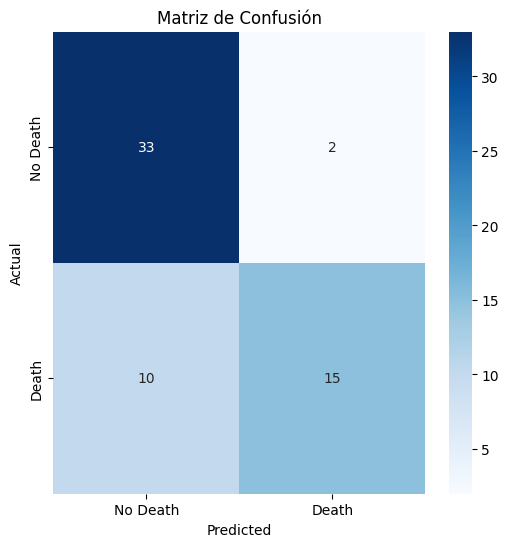

In [ ]:



accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Generando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualizando la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=['No Death', 'Death'],
            yticklabels=['No Death', 'Death'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:


# Predicciones en el conjunto de entrenamiento
y_pred_train = log_reg.predict(X_train)

# Calculando la precisión (accuracy) en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)

# Calculando la precisión (accuracy) en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy en el Conjunto de Entrenamiento:", accuracy_train)
print("Accuracy en el Conjunto de Prueba:", accuracy_test)


Accuracy en el Conjunto de Entrenamiento: 0.8368200836820083
Accuracy en el Conjunto de Prueba: 0.8


# ***11. Utilice uno de los instrumentos propuestos en clase para seleccionar las variables con mayor poder predictivo.***


In [ ]:
# Instanciando el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
# Creando un DataFrame para visualizar mejor la importancia de las características
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Ordenando las características por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)


                     Feature  Importance
11                      time    0.376529
7           serum_creatinine    0.158522
4          ejection_fraction    0.110294
2   creatinine_phosphokinase    0.081968
0                        age    0.078695
6                  platelets    0.073257
8               serum_sodium    0.064260
1                    anaemia    0.015283
10                   smoking    0.011660
3                   diabetes    0.010257
5        high_blood_pressure    0.009878
9                        sex    0.009397


Aprovechando que tambien tenemos el otro modelo verifiquemos

In [ ]:
# Funciones de seleccion forward y backward para modelos lineales de statsmodels
# ==============================================================================

def forward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia adelante (forward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo añadiendo variables.

    Parameters
    ----------
    X: pd.DataFrame
        Matriz de predictores
    y: pd.Series
        Variable respuesta
    metrica: str, default='aic'
        Métrica utilizada para seleccionar las variables. Debe ser una de las
        siguientes opciones: 'aic', 'bic', 'rsquared_adj'.
    add_constant: bool, default=True
        Si `True` añade una columna de 1s a la matriz de predictores con el
        con el nombre de intercept.
    verbose: bool, default=True
        Si `True` muestra por pantalla los resultados de cada iteración.

    Returns
    -------
    seleccion: list
        Lista con las variables seleccionadas.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    restantes = X.columns.to_list()
    seleccion = []
    if criterio == 'rsquared_adj':
        mejor_metrica = -np.inf
        ultima_metrica = -np.inf
    else:
        mejor_metrica = np.inf
        ultima_metrica = np.inf

    while restantes:
        metricas = []
        for candidata in restantes:
            seleccion_temp = seleccion + [candidata]
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                mejor_variable = restantes[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                mejor_variable = restantes[np.argmin(metricas)]
            else:
                break

        seleccion.append(mejor_variable)
        restantes.remove(mejor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)


def backward_selection(
    X: pd.DataFrame,
    y: pd.Series,
    criterio: str='aic',
    add_constant: bool=True,
    verbose: bool=True
)-> list:

    """
    Realiza un procedimiento de selección de variables hacia atrás (backward)
    utilizando como criterio de bondad la métrica especificada. El procedimiento
    se detiene cuando no es posible mejorar más el modelo eliminando variables.

    Parameters
    ----------
    X: pd.DataFrame
        Matriz de predictores
    y: pd.Series
        Variable respuesta
    metrica: str, default='aic'
        Métrica utilizada para seleccionar las variables. Debe ser una de las
        siguientes opciones: 'aic', 'bic', 'rsquared_adj'.
    add_constant: bool, default=True
        Si `True` añade una columna de 1s a la matriz de predictores con el
        con el nombre de intercept.
    verbose: bool, default=True
        Si `True` muestra por pantalla los resultados de cada iteración.

    Returns
    -------
    seleccion: list
        Lista con las variables seleccionadas.
    """

    if add_constant:
        X = sm.add_constant(X, prepend=True).rename(columns={'const':'intercept'})

    # Se inicia con todas las variables como predictores
    seleccion = X.columns.to_list()
    modelo  = sm.OLS(endog=y, exog=X[seleccion])
    modelo_res = modelo.fit()
    ultima_metrica = getattr(modelo_res, criterio)
    mejor_metrica = ultima_metrica
    if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    while seleccion:
        metricas = []
        for candidata in seleccion:
            seleccion_temp = seleccion.copy()
            seleccion_temp.remove(candidata)
            modelo  = sm.OLS(endog=y, exog=X[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                peor_variable = seleccion[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                peor_variable = seleccion[np.argmin(metricas)]
            else:
                break

        seleccion.remove(peor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return sorted(seleccion)

In [ ]:
# Selección de variables hacia forward
# ==============================================================================
predictores = forward_selection(
    X            = X_train,
    y            = y_train,
    criterio     = 'aic',
    add_constant = False, # Ya se le añadió anteriormente
    verbose      = True
)
predictores

variables: ['serum_creatinine'] | aic: 282.348
variables: ['serum_creatinine', 'time'] | aic: 266.900
variables: ['serum_creatinine', 'time', 'age'] | aic: 197.965
variables: ['serum_creatinine', 'time', 'age', 'ejection_fraction'] | aic: 186.758
variables: ['serum_creatinine', 'time', 'age', 'ejection_fraction', 'serum_sodium'] | aic: 180.939
variables: ['serum_creatinine', 'time', 'age', 'ejection_fraction', 'serum_sodium', 'sex'] | aic: 180.602


['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'sex', 'time']

In [ ]:
predictores1= backward_selection(
    X            = X_train,
    y            = y_train,
    criterio     = 'aic',
    add_constant = False, # Ya se le añadió anteriormente
    verbose      = True
)
predictores1


variables: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'] | aic: 190.253
variables: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'] | aic: 188.282
variables: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex', 'time'] | aic: 186.384
variables: ['age', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex', 'time'] | aic: 184.561
variables: ['age', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'sex', 'time'] | aic: 182.851
variables: ['age', 'diabetes', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'sex', 'time'] | aic: 

['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'sex', 'time']

# ***12. Ahora entrenaremos con las de mayor importancia .***

In [ ]:
# Selecciono las variabels con mayor importancia segu los datos mostrados anteriormente
selected_features = feature_importances_df[feature_importances_df['Importance'] > 0.05]['Feature']

# Creando nuevos conjuntos de datos con solo las variables seleccionadas
X_train_optimized = X_train[selected_features]
X_test_optimized = X_test[selected_features]


log_reg_optimized = LogisticRegression(max_iter=1000)
log_reg_optimized.fit(X_train_optimized, y_train)

# Calculando la precisión en los conjuntos de entrenamiento y prueba con las variables optimizadas
accuracy_train_optimized = accuracy_score(y_train, log_reg_optimized.predict(X_train_optimized))
accuracy_test_optimized = accuracy_score(y_test, log_reg_optimized.predict(X_test_optimized))

print("Precisión en el Conjunto de Entrenamiento con Variables Optimizadas:", accuracy_train_optimized)
print("Precisión en el Conjunto de Prueba con Variables Optimizadas:", accuracy_test_optimized)


Precisión en el Conjunto de Entrenamiento con Variables Optimizadas: 0.8368200836820083
Precisión en el Conjunto de Prueba con Variables Optimizadas: 0.8


# ***13.Realice el pronóstico con las variables optimizadas.***

In [ ]:
# Realizando predicciones de clase con el conjunto de prueba optimizado
y_pred_test_optimized = log_reg_optimized.predict(X_test_optimized)


y_pred_proba_optimized = log_reg_optimized.predict_proba(X_test_optimized)


print("Predicciones del modelo:", y_pred_test_optimized[:10])
print("Probabilidades estimadas (Clase 0, Clase 1): \n", y_pred_proba_optimized[:10])
print("Etiquetas reales:", y_test.values[:10])


Predicciones del modelo: [0 0 0 1 0 0 1 0 1 0]
Probabilidades estimadas (Clase 0, Clase 1): 
 [[0.96155174 0.03844826]
 [0.98761012 0.01238988]
 [0.85241178 0.14758822]
 [0.09866895 0.90133105]
 [0.82967704 0.17032296]
 [0.98024957 0.01975043]
 [0.40497237 0.59502763]
 [0.90264622 0.09735378]
 [0.06143277 0.93856723]
 [0.76593936 0.23406064]]
Etiquetas reales: [0 0 1 1 0 0 1 0 1 0]


 # ***14.  Evalué el desempeño final del modelo con accuracy_Train y accuracy_Test***


In [ ]:


# Calculando la precisión en los conjuntos de entrenamiento y prueba con las variables optimizadas
accuracy_train_final = accuracy_score(y_train, log_reg_optimized.predict(X_train_optimized))
accuracy_test_final = accuracy_score(y_test, log_reg_optimized.predict(X_test_optimized))

print("Precisión en el Conjunto de Entrenamiento Final:", accuracy_train_final)
print("Precisión en el Conjunto de Prueba Final:", accuracy_test_final)


Precisión en el Conjunto de Entrenamiento Final: 0.8368200836820083
Precisión en el Conjunto de Prueba Final: 0.8


Por cuestion de desarrollo final mostrare una grafica para que se vea evidenciado

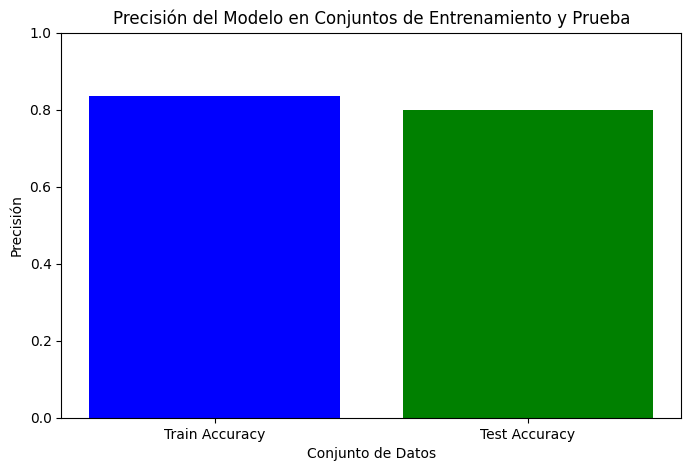

In [ ]:



labels = ['Train Accuracy', 'Test Accuracy']


accuracies = [accuracy_train_final, accuracy_test_final]


plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Conjunto de Datos')
plt.ylabel('Precisión')
plt.title('Precisión del Modelo en Conjuntos de Entrenamiento y Prueba')
plt.ylim([0, 1])
plt.show()


 # ***15. ¿Qué concluye?***



El análisis del modelo de regresión logística aplicado a datos clínicos de insuficiencia cardíaca arroja resultados significativos en varias etapas:

Desempeño del Modelo: Exhibe una alta precisión, con un 83.68% en entrenamiento y un 80% en pruebas, demostrando su eficacia en predecir muertes por insuficiencia cardíaca. Esta eficacia puede verse reflejada ya que al principio el modelo daba mas omenos 80%

Importancia de las Variables: La selección de variables a través de Random Forest indica que factores como el tiempo, la creatinina sérica y la fracción de eyección son cruciales para predecir los resultados.

Simplificación del Modelo: Al reentrenar el modelo con solo las variables más significativas, se conserva un nivel de precisión similar, lo que indica que estas variables son esenciales y el modelo puede simplificarse sin perder mucha precisión.

Aplicación Práctica: El modelo podría ser útil en entornos clínicos para identificar pacientes con alto riesgo de mortalidad por insuficiencia cardíaca, aunque debería usarse en conjunto con la evaluación clínica y la consideración de las circunstancias individuales del paciente esto evaluado por doctores los cuales ya tienen experiencia en el area y podrían determinar con mayor facilidad si esto esta bien. Ademas este modelo de ser aceptado clinicamente podría facilitar el trabajo de doctores. Ya que ellos no tendrian que analizar a detalle un paciente teniendo en cuenta todos los que tienen y que ademas , a un doctor por error humano puede que se le pase cualquier detalle sobre unos datos y exponer a un paciente a que corra riesgos por culpa de este error humano.